<a href="https://colab.research.google.com/github/PomesHouse/SkillTreePython-DeepLearning/blob/main/01.%EB%94%A5%EB%9F%AC%EB%8B%9Dwith%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0-basic/ch01_05_DNN%EA%B8%B0%EC%B4%88_%EB%8B%A4%EC%A4%91%EB%B6%84%EB%A5%98%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch01.05. 딥러닝 다중 분류 모델
---
* 날짜:
* 이름:

## 학습내용
    - 딥러닝을 이용한 멀티클래스 분류 진행
    - 적절한 손실함수와 최적화 함수 정의
    - 평가 및 예측
    
## 학습자료

* 모두의딥러닝
* 데이터
  * `iris.csv`
  * MNIST 데이터셋


```
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
seed=1
np.random.seed(seed)
tf.random.set_seed(seed)
```

```
https://github.com/yebiny/SkillTreePython-DeepLearning.git
```

In [15]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
seed=1
np.random.seed(seed)
tf.random.set_seed(seed)

In [16]:
! git clone https://github.com/yebiny/SkillTreePython-DeepLearning.git

fatal: destination path 'SkillTreePython-DeepLearning' already exists and is not an empty directory.


## 아이리스 꽃 종류 예측
---


```
- 0 sepal_length  꽃받침 길이
- 1 sepal_width 꽃받침 너비
- 2 petal_length 꽃임 길이
- 3 petal_width 꽃잎 너비
- 4 species 꽃의 종류 {setosa, versicolor virginica}
```
<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0105-01.PNG?raw=true width=550>
</p>


In [17]:
data_path = '/content/SkillTreePython-DeepLearning/dataset/iris.csv'
df = pd.read_csv(data_path, header = None)
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Text(0.5, 1.0, 'all data_path')

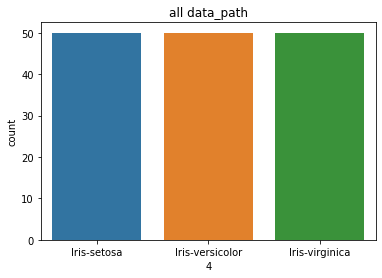

In [18]:
sns.countplot(x = df[4]); plt.title('all data_path')

In [19]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

def iris_preprocess(df, seed = 1):
    # x-y 분할 
    x = df.values[:,:-1] # (전체샘플, 마지막 변수 전까지)
    y = df.values[:, -1] # (전체샘플, 마지막 변수)
    #  정규화 (x 데이터만)
    ss = StandardScaler() 
    x = ss.fit_transform(x)
    # 원-핫 (y 데이터만)
    oh = OneHotEncoder(sparse = False)
    y = oh.fit_transform(np.expand_dims(y, 1)) # 인풋이 무조건 행렬 (150,) -> (150, 1)
    print(f'원-핫 변환 순서: {oh.categories_}')
    # train-test 분할
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,
                                                        random_state = seed,
                                                        stratify = y)
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = iris_preprocess(df)
print(f'데이터 형태: {x_train.shape}, {x_test.shape}, {y_train.shape}, {y_test.shape}') 
print(f'첫번째 샘플 x: {x_train[0]}, y: {y_train[0]}')
    

원-핫 변환 순서: [array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)]
데이터 형태: (105, 4), (45, 4), (105, 3), (45, 3)
첫번째 샘플 x: [ 0.55333328 -0.58776353  0.76275864  0.39617188], y: [0. 0. 1.]


* 예측값 분포 확인

Text(0.5, 1.0, 'test dataset')

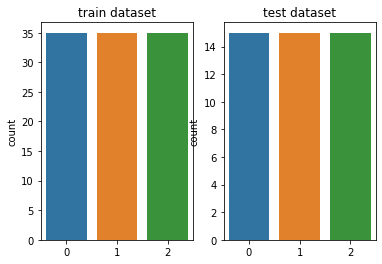

In [20]:
plt.subplot(121);sns.countplot(x = np.argmax(y_train, axis = 1)); plt.title('train dataset')
plt.subplot(122);sns.countplot(x = np.argmax(y_test, axis = 1)); plt.title('test dataset')

### | 모델


<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0105-02.PNG?raw=true width=800>
</p>


#### **모델 생성**

In [21]:
from tensorflow.keras import models, layers, utils

def build_model ():
    x = layers.Input(shape = (4,))
    y = layers.Dense(12, activation = 'relu')(x)
    y = layers.Dense(8, activation = 'relu')(y)
    y = layers.Dense(3, activation = 'softmax', name = 'OutputLayer')(y)
    model = models.Model(x, y, name = 'iris_classifier')
    return model

#### **모델 시각화**

* `model.summary()`
* `utils.plot_model()`

Model: "iris_classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_4 (Dense)             (None, 12)                60        
                                                                 
 dense_5 (Dense)             (None, 8)                 104       
                                                                 
 OutputLayer (Dense)         (None, 3)                 27        
                                                                 
Total params: 191
Trainable params: 191
Non-trainable params: 0
_________________________________________________________________


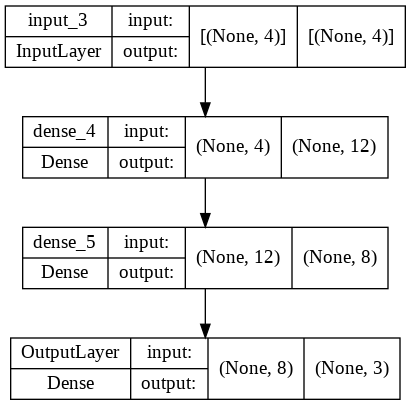

In [22]:
model = build_model()
model.summary()
utils.plot_model(model, show_shapes = True)

### | 학습

#### **모델 컴파일**

```
model.compile(loss, optimizer, metrics) 
```
* `loss` : 다중분류 문제, 'categorical_crossentropy'
* `optimizer` : 문제와 상관없음, 'adam'
* `metrics`: accuracy(정확도)


In [23]:
model.compile(loss = 'categorical_crossentropy',
               optimizer = 'adam',
               metrics = ['accuracy'])

#### **학습**

```
model.fit(x_train, y_train, epochs, batch_size)
```
* `x_train` : 넘파이 혹은 텐서 형식의 인풋 데이터
* `y_train` : 넘파이 혹은 텐서 형식의 아웃풋 데이터
* `epochs` : 학습 횟수
* `batch_size` : 배치 사이즈 ((업데이트 한번에 사용될 샘플 개수)

In [24]:
model.fit(x_train, y_train,
          epochs = 200,
          batch_size = 8,
          verbose = 0)

### | 검증 및 예측


#### **검증**

```
model.evaluate(x_test, y_test)
```
* `x_test` : 넘파이 혹은 텐서 형식의 인풋 테스트 데이터
* `y_test` : 넘파이 혹은 텐서 형식의 아웃풋 테스트 데이터

In [25]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.0813 - accuracy: 0.9556


[0.08130056411027908, 0.9555555582046509]

#### **예측**

```
model.predict(x_test)
```
* `x_test` : 넘파이 혹은 텐서 형식의 인풋 테스트 데이터
* `y_test` : 넘파이 혹은 텐서 형식의 아웃풋 테스트 데이터

In [26]:
y_pred = model.predict(x_test)
print(y_test.shape, y_pred.shape)
print(y_test[0], y_pred[0])
# 원핫 -> 라벨
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
print(y_test.shape, y_pred.shape)
print(y_test[0], y_pred[0])

(45, 3) (45, 3)
[1. 0. 0.] [9.9996901e-01 3.1051237e-05 3.1163765e-18]
(45,) (45,)
0 0


* 예측 시각화

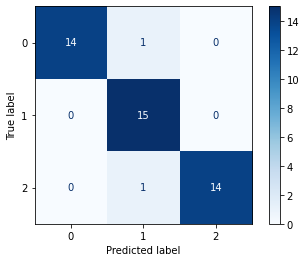

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
#print(cm)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')

## 과제
---

### | 과제1. 이진분류 문제 정리

* 예측값의 범위 : 0 ~ 1
* 예측값의 shape : (샘플 개수, 1)
* 아웃풋 레이어의 노드 개수 : 1
* 아웃풋 레이어의 activation : 'sigmoid'
* 손실함수 (loss) : 'binary_crossentropy
* 평가함수 (metrics) : 'accuracy'

### | 과제2. 한 셀에 코드 정리하기

* 추가 연습
  * 모델의 깊이(depth)를 늘려가며 학습해 보세요.
  * 모델의 너비(width)를 늘려가며 학습해 보세요.

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers, utils

def iris_preprocess(df, seed=1):
  np.random.seed(seed)
  tf.random.set_seed(seed)
  x = df.values[:, :-1] 
  y = df.values[:, -1]
  # 정규화 (x 데이터만)
  ss = StandardScaler()
  x = ss.fit_transform(x)
  # 원-핫 (y 데이터만)
  oh = OneHotEncoder(sparse=False)
  y = oh.fit_transform(np.expand_dims(y, 1)) # 인풋이 무조건 행렬 (150, ) -> (150, 1)
  print(f'원-핫 변환 순서: {oh.categories_}')
  # train-test 분할
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,
                                                      random_state=seed,
                                                      stratify = y)
  return x_train, x_test, y_train, y_test

def build_model():
  x = layers.Input(shape=(4,))
  y = layers.Dense(12, activation='relu')(x) # y = layers.Dense(16, activation='relu')(x) # 모델 너비 추가
  y = layers.Dense(8, activation='relu')(y)
#  y = layers.Dense(6, activation = 'relu)(y) # 모델 깊이 추가
  y = layers.Dense(3, activation='softmax', name='OutputLayer')(y)
  model = models.Model(x, y)
  return model

model = build_model()
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=200, batch_size=8, verbose = 0)
model.evaluate(x_test, y_test)

y_pred = model.predict(x_test)

# 원핫 -> 라벨
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
#print(cm)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')

### | 과제 3. MNIST 숫자 데이터 분류

```
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
```

In [29]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers, utils

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# 정규화 (x)
x_train = x_train/255. # (0 ~ 1)
x_test = x_test/255.
# 원핫 (y) -> 안하고 작동시켜보기 
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


* 데이터 시각화

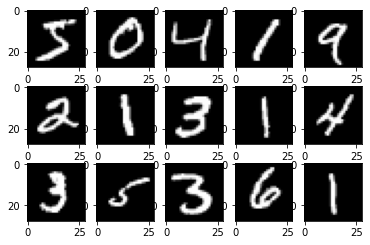

In [30]:
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(x_train[i], cmap ='gray')

### | 모델


<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0105-03.PNG?raw=true width=500>
</p>


#### **모델 생성**

In [31]:
from tensorflow.keras import models, layers, utils

def build_mnistmodel():
    x = layers.Input(shape = (28,28))
    y = layers.Flatten()(x)
    y = layers.Dense(20, activation = 'relu')(y) # 중간층  (내 멋대로)  
    y = layers.Dense(10, activation = 'softmax')(y)
    model = models.Model(x,y)
    return model

#### **모델 시각화**

* `model.summary()`
* `utils.plot_model()`

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 20)                15700     
                                                                 
 dense_9 (Dense)             (None, 10)                210       
                                                                 
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


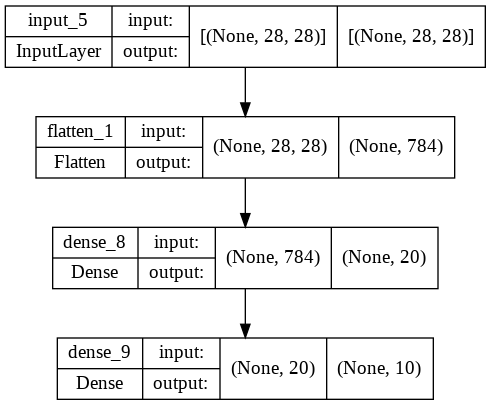

In [32]:
model_mnist = build_mnistmodel()
model_mnist.summary()
utils.plot_model(model_mnist, show_shapes = True)

### | 학습

#### **모델 컴파일**

```
model.compile(loss, optimizer, metrics) 
```
* `loss` : 다중분류 문제 
 * `categorical_ crossentropy` :원-핫 완료된 상태 
 * `sparse_categorical_crossentropy`: 원-핫 안된 상태 
* `optimizer` :  
* `metrics`: 


In [33]:
model_mnist.compile(loss = 'sparse_categorical_crossentropy',
                    optimizer = 'adam',
                    metrics = ['accuracy'])

#### **학습**

```
model.fit(x_train, y_train, epochs, batch_size)
```
* `x_train` : 넘파이 혹은 텐서 형식의 인풋 데이터
* `y_train` : 넘파이 혹은 텐서 형식의 아웃풋 데이터
* `epochs` : 학습 횟수
* `batch_size` : 배치 사이즈 ((업데이트 한번에 사용될 샘플 개수)

In [34]:
y_train = np.expand_dims(y_train, 1)
y_test = np.expand_dims(y_test,1)
print(f'데이터 형태 y_train: {y_train.shape}, y_test: {y_test.shape}')

데이터 형태 y_train: (60000, 1), y_test: (10000, 1)


In [35]:
model_mnist.fit(x_train, y_train, 
                epochs = 20, 
                batch_size = 100, 
                verbose = 0
                )

### | 검증 및 예측


#### **검증**

```
model.evaluate(x_test, y_test)
```
* `x_test` : 넘파이 혹은 텐서 형식의 인풋 테스트 데이터
* `y_test` : 넘파이 혹은 텐서 형식의 아웃풋 테스트 데이터

In [36]:
model_mnist.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1476 - accuracy: 0.9550


[0.1475570648908615, 0.9549999833106995]

#### **예측**

```
model.predict(x_test)
```
* `x_test` : 넘파이 혹은 텐서 형식의 인풋 테스트 데이터
* `y_test` : 넘파이 혹은 텐서 형식의 아웃풋 테스트 데이터

In [37]:
y_pred = model_mnist.predict(x_test)
print(y_test.shape, y_pred.shape)
y_pred = np.argmax(y_pred, axis=1)
print(y_test[0], y_pred[0])

(10000, 1) (10000, 10)
[7] 7


* 예측 시각화

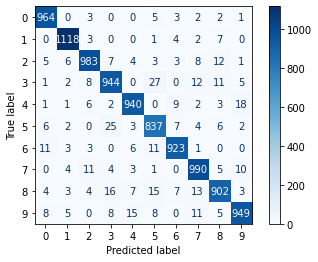

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
#print(cm)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')

* 모델 활용